### Created based on a synthetic data frame: https://bit.ly/music-csv

In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
music_data = pd.read_csv('music.csv')
music_data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [5]:
music_data.describe()

,age,gender
count,18.000000,18.000000
mean,27.944444,0.500000
std,5.127460,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,28.000000,0.500000
75%,31.000000,1.000000
max,37.000000,1.000000


In [8]:
#Create input set
X = music_data.drop(columns=['genre'])
X

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [10]:
#Create output dataset
y = music_data['genre']
y

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

### Train the model using all dataset & Test using 2 new data point

In [54]:
#Train the model
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

In [55]:
#Predict a new data points
predictions = model.predict([[21,1], [22,0]])
predictions

C:\Users\flexi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop', 'Dance'], dtype=object)

In [56]:
predictions = model.predict([[5,1], [28,0]])
predictions

C:\Users\flexi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop', 'Acoustic'], dtype=object)

### Train the model using 80:20 Train-Test split

In [57]:
#Split the train & test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.2)

In [58]:
#Train the model
model_2 = DecisionTreeClassifier()
model_2.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
#Check the model's accuracy
predictions_2 = model_2.predict(X_test)
score = accuracy_score(y_test, predictions_2)
score

1.0

In [63]:
#Test this new model with synthetic testing data
predictions_3 = model_2.predict([[21,1], [22,0]])
predictions_3

C:\Users\flexi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop', 'Dance'], dtype=object)

### Model Persistance
To save a model & call it when we need it

In [66]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import joblib

music_data = pd.read_csv('music.csv')
music_data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.2)

model_2 = DecisionTreeClassifier()
model_2.fit(X_train,y_train)

joblib.dump(model_2, 'music_recommender.joblib')

#predictions_3 = model_2.predict([[21,1], [22,0]])

['music_recommender.joblib']

In [68]:
#Load the model

model_load = joblib.load('music_recommender.joblib')
predictions_3 = model_load.predict([[21,1], [22,0]])
predictions_3

C:\Users\flexi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop', 'Dance'], dtype=object)

### Visualizing Decision Tree

In [69]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Using all dataset to train
music_data = pd.read_csv('music.csv')
music_data

X = music_data.drop(columns=['genre'])
y = music_data['genre']

model = DecisionTreeClassifier()
model.fit(X,y)

tree.export_graphviz(model, out_file = 'music-recommender_all_data', feature_names = ['age','gender'], 
                     class_names=sorted(y.unique()),
                    label = 'all',
                    rounded=True,
                    filled=True)

In [72]:
#Decision Tree visualization

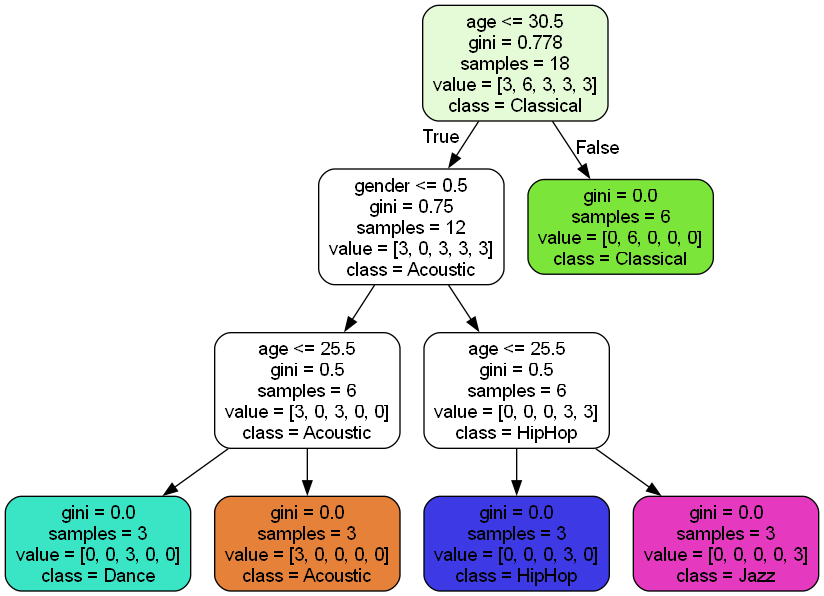